# Telco Customer Churn Prediction

This notebook demonstrates an end-to-end process for predicting customer churn in a telecommunications company.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Initial Exploration

Load the dataset and perform initial checks on its structure, missing values, and data types.

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Cleaning and Preprocessing

Address missing values, handle categorical features, and scale numerical features. The 'customerID' column is dropped as it's not relevant for prediction. The 'TotalCharges' column is converted to numeric.

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


None

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


## 3. Exploratory Data Analysis (EDA)

Visualize the distribution of numerical and categorical features, and explore their relationship with the target variable 'Churn'. This helps in understanding the data and identifying potential predictors.

array([[<Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'tenure'}>, <Axes: >]], dtype=object)

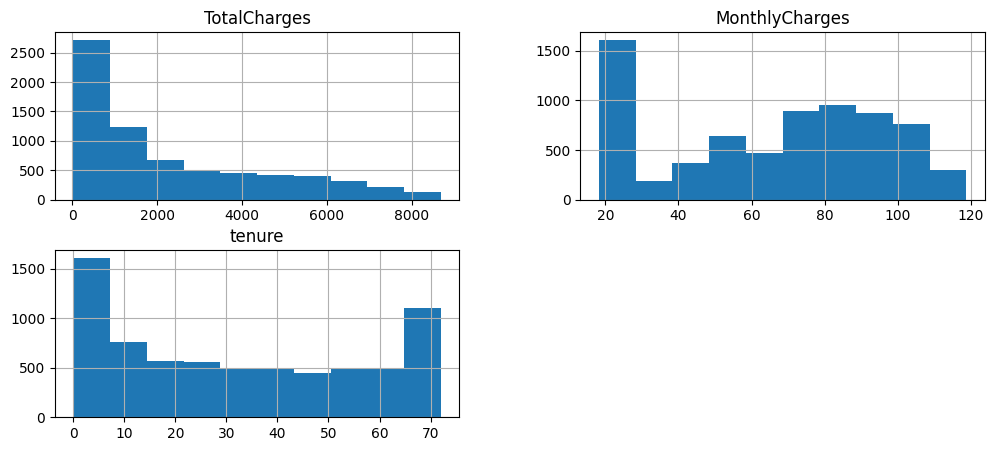

In [ ]:
df[['TotalCharges', 'MonthlyCharges', 'tenure']].hist(figsize=(12, 5))

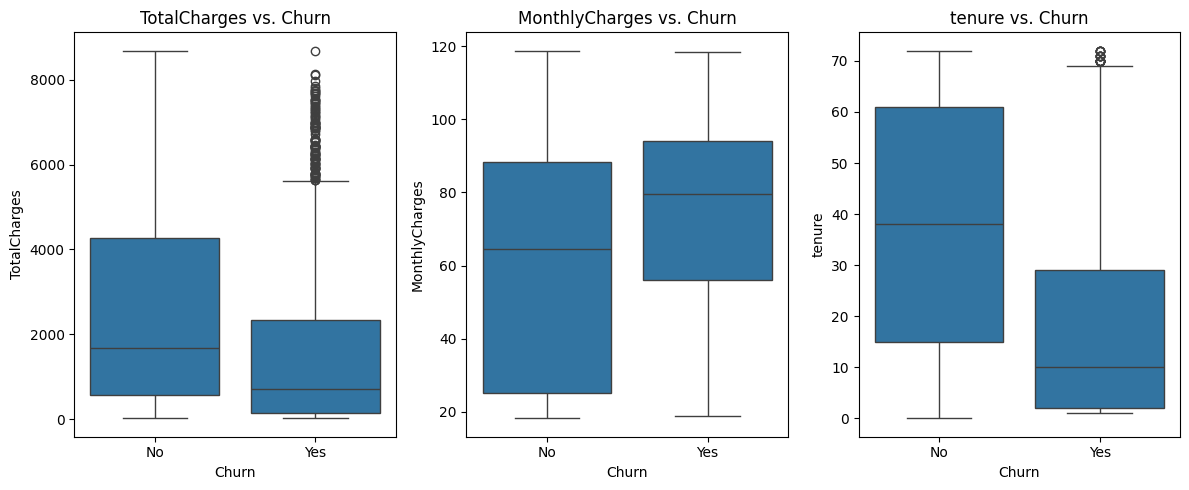

In [ ]:
numerical_features = ['TotalCharges', 'MonthlyCharges', 'tenure']
plt.figure(figsize=(12, 5))

for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Churn')

plt.tight_layout()
plt.show()

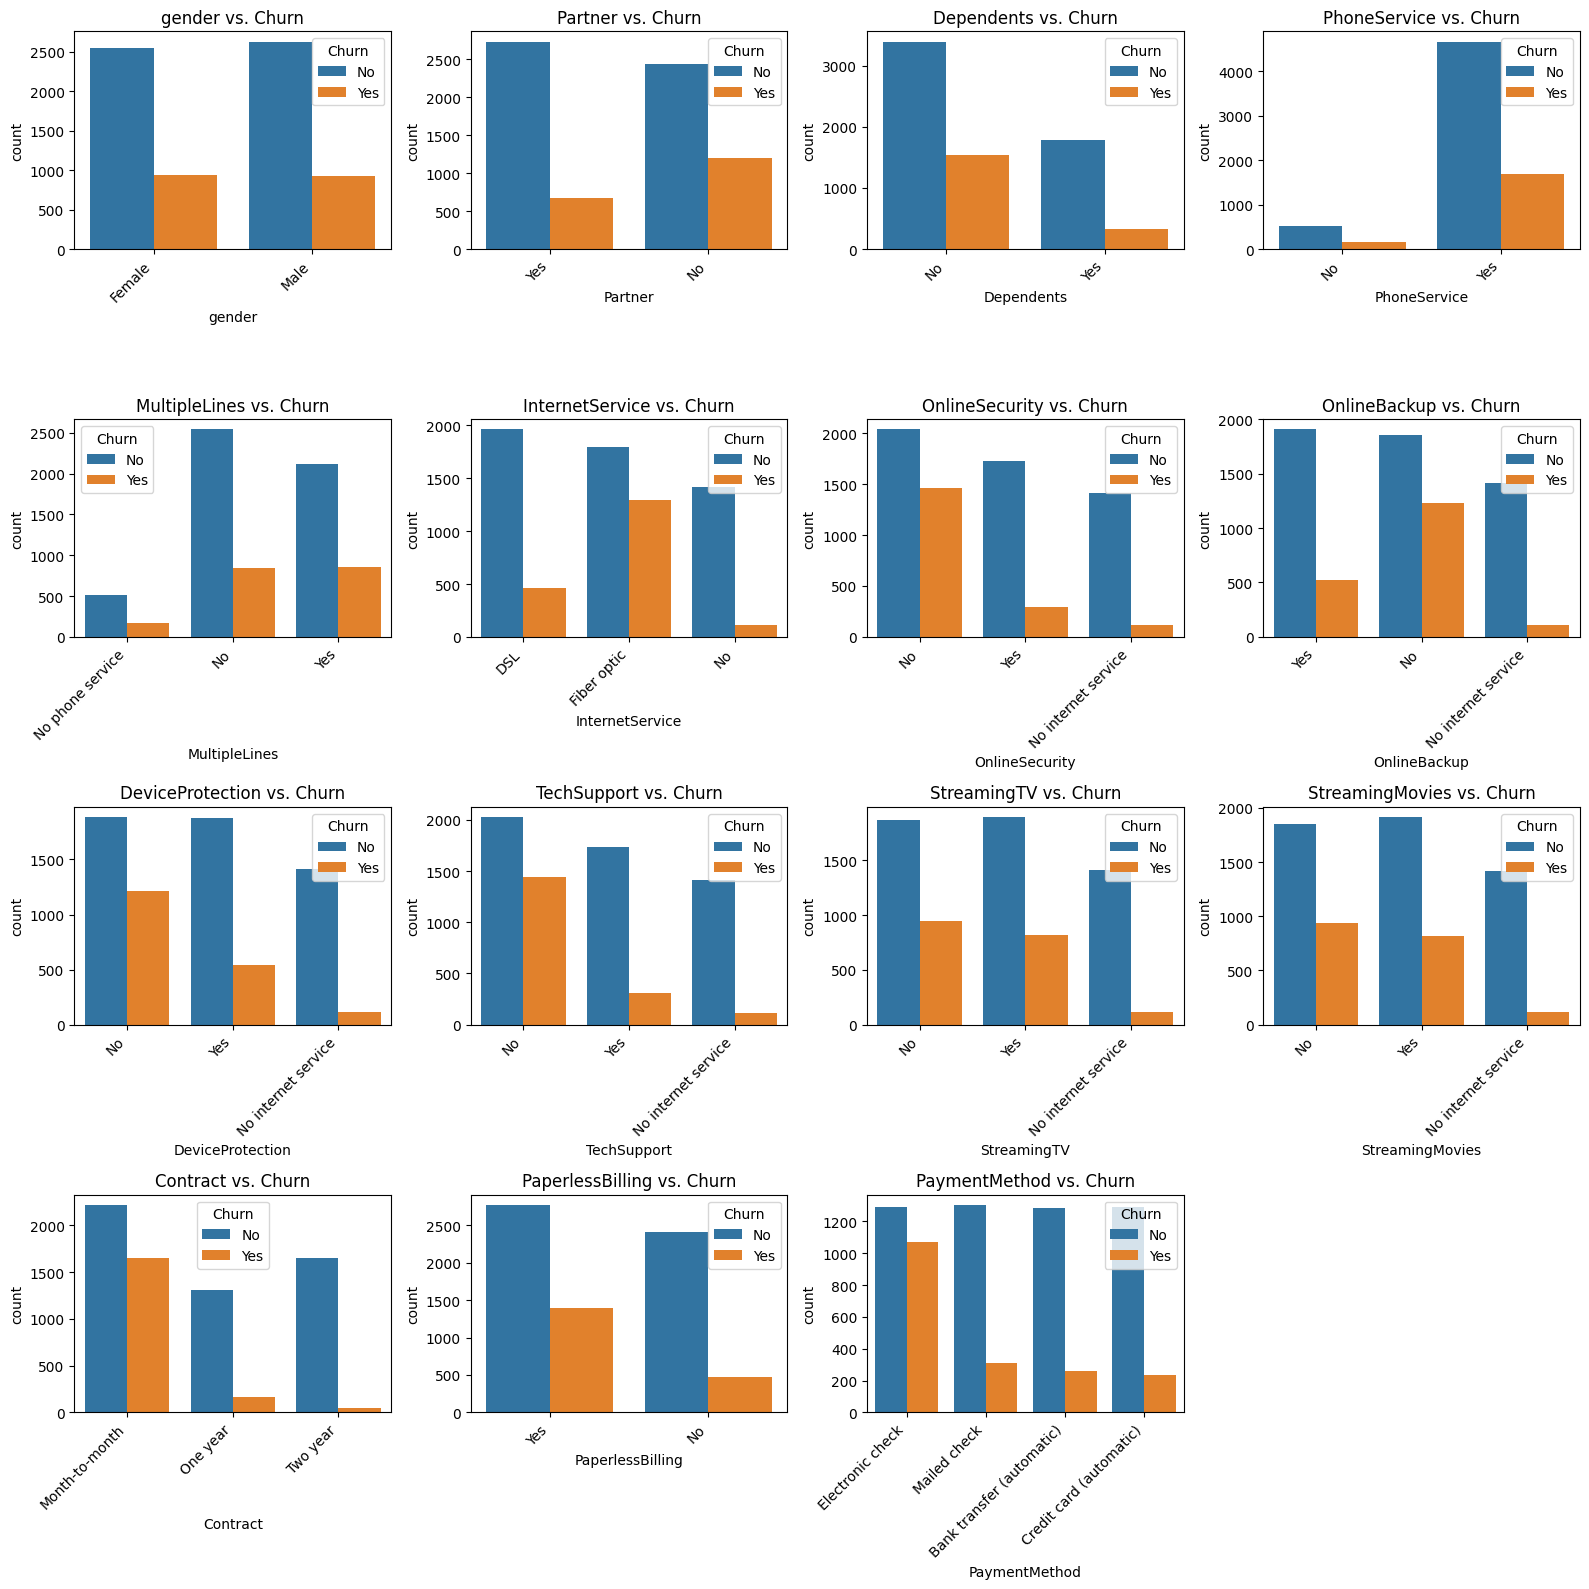

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Exclude 'Churn' itself if it's included in the object columns
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

n_cols = 4
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs. Churn')
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability

plt.tight_layout()
plt.show()

In [ ]:
numerical_features = ['TotalCharges', 'MonthlyCharges', 'tenure']

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Number of outliers in '{col}': {len(outliers)}")
    # Optionally, display the outlier rows
    # display(outliers)

Number of outliers in 'TotalCharges': 0
Number of outliers in 'MonthlyCharges': 0
Number of outliers in 'tenure': 0


In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from sklearn.impute import SimpleImputer

# Define transformations
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Add imputer for missing values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## 4. Model Training and Evaluation

Train Logistic Regression and Random Forest models on the preprocessed data. GridSearchCV is used to find the best hyperparameters for each model. The models are evaluated using classification reports.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define full pipeline with model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Logistic Regression Grid
logreg_params = {
    'classifier__C': [0.1, 1, 10]
}

# Random Forest Grid
rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# GridSearch for Logistic Regression
logreg_grid = GridSearchCV(logreg_pipeline, param_grid=logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

# GridSearch for Random Forest
rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression
print("Logistic Regression:")
print("Best Params:", logreg_grid.best_params_)
print(classification_report(y_test, logreg_grid.predict(X_test)))

# Random Forest
print("Random Forest:")
print("Best Params:", rf_grid.best_params_)
print(classification_report(y_test, rf_grid.predict(X_test)))

Logistic Regression:
Best Params: {'classifier__C': 10}
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Random Forest:
Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



## 5. Handling Class Imbalance

The dataset has an imbalanced target variable ('Churn'). SMOTE (Synthetic Minority Over-sampling Technique) is used to oversample the minority class ('Yes'), addressing this imbalance and improving model performance.

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Redefine pipelines to include SMOTE
logreg_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Redefine GridSearch objects to use the new pipelines
logreg_grid_smote = GridSearchCV(logreg_pipeline_smote, param_grid=logreg_params, cv=5, scoring='accuracy')
rf_grid_smote = GridSearchCV(rf_pipeline_smote, param_grid=rf_params, cv=5, scoring='accuracy')

print("Pipelines and GridSearchCV objects redefined with SMOTE.")

Pipelines and GridSearchCV objects redefined with SMOTE.


In [ ]:
print("Fitting Logistic Regression with SMOTE...")
logreg_grid_smote.fit(X_train, y_train)

print("\nFitting Random Forest with SMOTE...")
rf_grid_smote.fit(X_train, y_train)

print("Model fitting with SMOTE complete.")

Fitting Logistic Regression with SMOTE...

Fitting Random Forest with SMOTE...
Model fitting with SMOTE complete.


In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression with SMOTE
print("Logistic Regression with SMOTE:")
print("Best Params:", logreg_grid_smote.best_params_)
print(classification_report(y_test, logreg_grid_smote.predict(X_test)))

# Random Forest with SMOTE
print("\nRandom Forest with SMOTE:")
print("Best Params:", rf_grid_smote.best_params_)
print(classification_report(y_test, rf_grid_smote.predict(X_test)))

Logistic Regression with SMOTE:
Best Params: {'classifier__C': 0.1}
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409


Random Forest with SMOTE:
Best Params: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.57      0.58      0.58       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



## 6. Model Export

Export the best performing pipeline (including preprocessing and the chosen model) to a file using `joblib` for future use in making predictions on new data.

In [ ]:
import joblib

best_pipeline = logreg_grid_smote.best_estimator_

filename = 'churn_prediction_pipeline.pkl'

# Export the pipeline using joblib
joblib.dump(best_pipeline, filename)

print(f"Exported the best pipeline to '{filename}' using joblib.")

Exported the best pipeline to 'churn_prediction_pipeline.pkl' using joblib.
